# Peruvian Athletes at the Olympics: A Performance Overview (1936-2022)

## Project Description

This project focuses on analyzing the performance of Peruvian athletes in the Summer and Winter Olympic Games from 1896 to 2022. The analysis is conducted using Python for data manipulation, visualization, and statistical insights, complemented by Power BI for interactive dashboards. The goal is to explore various aspects of the athletes' participation, such as rankings, event performance, and historical trends, to provide a comprehensive overview of Peru's Olympic history.

### Limitations

The dataset does not include the results recently obtained in Paris 2024. Therefore, the bronze medal obtained in these last Olympic Games and other remarkable results are not included.
In addition, there were some missing data regarding athlete names (e.g. volleyball teams) and some times achieved (e.g. Kimberly Garcia in Rio 2016). For this reason, it was not possible to analyse the number of athletes who attended each venue, but rather the participation in disciplines and events, whether individual or team.

### Data source

https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018/data?select=olympic_results.csv

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import csv

In [2]:
olympic_results = pd.read_csv('./olympic_results.csv', header=0)
olympic_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


## Filter by country (Peru)

In [3]:
# Load and filter the Olympic results dataset for Peruvian athletes
olympic_results_peru = olympic_results[olympic_results['country_name']=='Peru']
olympic_results_peru.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
2328,Alpine Skiing,Women's Giant Slalom,beijing-2022,Athlete,NaN,NaN,False,46,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,2:24.05,TIME
2414,Alpine Skiing,Women's Slalom,beijing-2022,Athlete,NaN,NaN,False,44,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,2:04.59,TIME
3891,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,18,Peru,PE,PER,https://olympics.com/en/athletes/marko-carrillo,Marko CARRILLO,NaN,NaN
4027,Shooting,Trap Men,tokyo-2020,Athlete,NaN,NaN,False,27,Peru,PE,PER,https://olympics.com/en/athletes/alessandro-de...,Alessandro DE SOUZA FERREIRA,NaN,NaN
4232,Shooting,10m Air Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,29,Peru,PE,PER,https://olympics.com/en/athletes/marko-carrillo,Marko CARRILLO,NaN,NaN


In [4]:
olympic_results_peru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 2328 to 145486
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       338 non-null    object
 1   event_title            338 non-null    object
 2   slug_game              338 non-null    object
 3   participant_type       338 non-null    object
 4   medal_type             4 non-null      object
 5   athletes               4 non-null      object
 6   rank_equal             85 non-null     object
 7   rank_position          318 non-null    object
 8   country_name           338 non-null    object
 9   country_code           338 non-null    object
 10  country_3_letter_code  338 non-null    object
 11  athlete_url            285 non-null    object
 12  athlete_full_name      317 non-null    object
 13  value_unit             119 non-null    object
 14  value_type             142 non-null    object
dtypes: object(15)
memory u

## Export to csv

In [7]:
olympic_results_peru.to_csv('olympic_results_peru.csv', index=False)

## Temporal distribution

Question: How has the participation of Peruvian athletes in the Olympics varied over the years?

In [6]:
# Load the dataset containing Olympic game details (season and year)
olympic_hosts = pd.read_csv('./olympic_hosts.csv', header=0)
olympic_hosts = olympic_hosts[['game_slug', 'game_season','game_year']]
olympic_hosts.head()

,game_slug,game_season,game_year
0,beijing-2022,Winter,2022
1,tokyo-2020,Summer,2020
2,pyeongchang-2018,Winter,2018
3,rio-2016,Summer,2016
4,sochi-2014,Winter,2014


In [7]:
# Merge the Peruvian athlete results with the Olympic game details
olympic_results_peru_v2 = pd.merge(olympic_results_peru, olympic_hosts, left_on='slug_game', right_on='game_slug', how='left')
olympic_results_peru_v2 = olympic_results_peru_v2.drop(columns=['game_slug'])
olympic_results_peru_v2.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,game_season,game_year
0,Alpine Skiing,Women's Giant Slalom,beijing-2022,Athlete,NaN,NaN,False,46,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,2:24.05,TIME,Winter,2022
1,Alpine Skiing,Women's Slalom,beijing-2022,Athlete,NaN,NaN,False,44,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,2:04.59,TIME,Winter,2022
2,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,18,Peru,PE,PER,https://olympics.com/en/athletes/marko-carrillo,Marko CARRILLO,NaN,NaN,Summer,2020
3,Shooting,Trap Men,tokyo-2020,Athlete,NaN,NaN,False,27,Peru,PE,PER,https://olympics.com/en/athletes/alessandro-de...,Alessandro DE SOUZA FERREIRA,NaN,NaN,Summer,2020
4,Shooting,10m Air Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,29,Peru,PE,PER,https://olympics.com/en/athletes/marko-carrillo,Marko CARRILLO,NaN,NaN,Summer,2020


In [8]:
# Group by year, game, and season to calculate the number of participations
participation = olympic_results_peru_v2.groupby(['game_year', 'slug_game', 'game_season']).size().reset_index(name='num_participations')
participation = participation.sort_values('game_year')

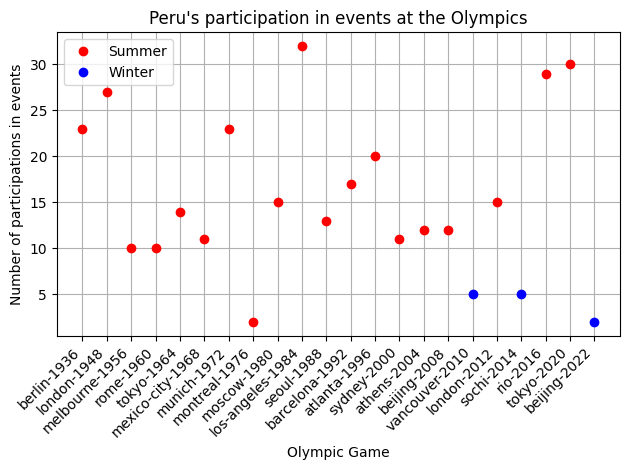

In [9]:
fig, ax = plt.subplots()

for _, row in participation.iterrows():
    if row['game_season'] == 'Summer':
        ax.plot(row['slug_game'], row['num_participations'], 'ro', label='Summer' if 'Summer' not in ax.get_legend_handles_labels()[1] else "")
    else:
        ax.plot(row['slug_game'], row['num_participations'], 'bo', label='Winter' if 'Winter' not in ax.get_legend_handles_labels()[1] else "")

ax.set_title("Peru's participation in events at the Olympics")
ax.set_xlabel('Olympic Game')
ax.set_ylabel('Number of participations in events')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

Answer: In the Summer Olympics, Peru does not seem to have a marked trend in the number of participations, being in most cases between 10 to 20 events per Olympic Games. On the other hand, at the Winter Olympics, Peru has just three attendances and a maximum of five events per Olympic Games.

## Performance analysis

Question: What is the discipline in which Peruvian athletes have obtained the best rankings?

In [10]:
# Convert rank positions to numeric values, handling non-numeric entries as NaN
olympic_results_peru_v2['rank_position'] = pd.to_numeric(olympic_results_peru_v2['rank_position'], errors='coerce')

# Filter to only include valid rank positions
olympic_valid_ranks = olympic_results_peru_v2[olympic_results_peru_v2['rank_position'].notna()]

# Find the best (lowest) rank position for each discipline
best_ranks = olympic_valid_ranks.groupby('discipline_title')['rank_position'].min().reset_index()

best_ranks.sort_values('rank_position').head(10)

,discipline_title,rank_position
18,Shooting,1.0
25,Volleyball,2.0
21,Swimming,4.0
23,Taekwondo,5.0
4,Boxing,5.0
19,Skateboarding,5.0
12,Football,5.0
3,Basketball,7.0
14,Karate,7.0
26,Weightlifting,7.0


Answer: The disciplines with the best rankings for Peru were Shooting and Volleyball, both of which won medals.

## Medals and Achievements

Question: In which disciplines have Peruvian athletes achieved top positions, even if they did not win medals?

In [11]:
# Filter out rows where no medal was won and rank positions are valid
olympic_no_medals = olympic_results_peru_v2[olympic_results_peru_v2['medal_type'].isna() & olympic_results_peru_v2['rank_position'].notna()]

# Find the best rank positions by discipline and event
best_positions = olympic_no_medals.groupby(['discipline_title', 'event_title'])['rank_position'].min().reset_index()

# Convert the result to a DataFrame and sort by rank position
best_positions_df = pd.DataFrame(best_positions)

best_positions_df.sort_values('rank_position').head(20)

,discipline_title,event_title,rank_position
113,Volleyball,volleyball women,4.0
82,Shooting,trap 125 targets men,4.0
98,Swimming,200m individual medley men,4.0
25,Boxing,57-60kg lightweight men,5.0
41,Football,football men,5.0
28,Boxing,81kg heavyweight men,5.0
110,Taekwondo,58 - 68 kg men,5.0
79,Shooting,skeet (125 targets) men,5.0
83,Skateboarding,Men's Street,5.0
69,Shooting,50m pistol 60 shots men,6.0


Answer: The disciplines with the best places without medals were Swimming, Boxing, Football, Taekwondo and Skateboarding.

## Analysis of time values

Question: What have been the fastest times achieved by Peruvian athletes in timed disciplines?

In [12]:
from datetime import timedelta

temp = pd.DataFrame(olympic_results_peru_v2)

# Function to convert milliseconds to hh:mm:ss.s format
def milliseconds_to_hms(ms):
    if pd.isna(ms) or ms == 'no time' or ms == '':
        return 'no time'
    
    if ":" in ms:
        return ms

    try:
        ms = float(ms)
        hours = int(ms // 3600000)
        minutes = int((ms % 3600000) // 60000)
        seconds = (ms % 60000) // 1000
        milliseconds = int(ms % 1000 / 100) 
        return f"{hours:02}:{minutes:02}:{seconds:02}.{milliseconds}"
    except ValueError:
        return 'no time' # Return 'no time' if conversion fails

# Apply the conversion function to the 'value_unit' column for TIME values
temp['value_unit'] = temp.apply(lambda row: milliseconds_to_hms(row['value_unit']) 
                            if row['value_type'] == 'TIME' else row['value_unit'], axis=1)

temp[['value_unit', 'value_type']].head()

,value_unit,value_type
0,2:24.05,TIME
1,2:04.59,TIME
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [13]:
# Filter to include only TIME values, excluding 'no time'
olympic_results_times = temp[temp['value_type'] == 'TIME']

olympic_results_times = olympic_results_times[olympic_results_times['value_unit'] != 'no time']

# Function to convert hh:mm:ss.s format to seconds
def convert_time(time_str):
    min_sec = time_str.split(':')
    minutes = int(min_sec[0])
    seconds = float(min_sec[1])
    
    total_seconds = minutes * 60 + seconds
    time_delta = timedelta(seconds=total_seconds)
    
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{seconds:05.2f}"

# Apply the time conversion function to ensure uniform time formatting
olympic_results_times['value_unit'] = olympic_results_times.apply(
    lambda row: convert_time(row['value_unit']) if len(row['value_unit']) == 7 else row['value_unit'],
    axis=1
)

olympic_results_times.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,game_season,game_year
0,Alpine Skiing,Women's Giant Slalom,beijing-2022,Athlete,NaN,NaN,False,46.0,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,00:02:24.05,TIME,Winter,2022
1,Alpine Skiing,Women's Slalom,beijing-2022,Athlete,NaN,NaN,False,44.0,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,00:02:04.59,TIME,Winter,2022
37,Athletics,50km walk men,rio-2016,Athlete,NaN,NaN,NaN,48.0,Peru,PE,PER,https://olympics.com/en/athletes/pavel-chihuan,Pavel CHIHUAN,04:32:37.0.0,TIME,Summer,2016
39,Athletics,marathon women,rio-2016,Athlete,NaN,NaN,NaN,15.0,Peru,PE,PER,https://olympics.com/en/athletes/gladys-tejeda,Gladys TEJEDA,02:29:55.0.0,TIME,Summer,2016
40,Athletics,marathon women,rio-2016,Athlete,NaN,NaN,NaN,36.0,Peru,PE,PER,https://olympics.com/en/athletes/jovana-de-la-...,Jovana DE LA CRUZ,02:35:49.0.0,TIME,Summer,2016


In [14]:
# Convert the 'value_unit' column to timedelta for easier calculations
olympic_results_times['value_unit'] = pd.to_timedelta(olympic_results_times['value_unit'])

# Find the fastest times by event
fastest_times = olympic_results_times.groupby('event_title')['value_unit'].min()

fastest_times.sort_values()

event_title
K1 kayak single men          0 days 00:00:00.010000
pentathlon women             0 days 00:00:24.040000
Women's Slalom               0 days 00:02:04.590000
200m individual medley men   0 days 00:02:11.080000
Women's Giant Slalom         0 days 00:02:24.050000
giant slalom men                    0 days 00:03:02
giant slalom women           0 days 00:03:06.030000
5000m men                    0 days 00:13:43.010000
10000m men                          0 days 00:28:02
15km men                     0 days 00:45:53.060000
20km walk men                       0 days 01:24:48
20km race walk women                0 days 01:32:09
marathon men                        0 days 02:15:35
marathon women                      0 days 02:28:54
team time trial men          0 days 02:30:57.050000
50km walk men                       0 days 04:32:37
Name: value_unit, dtype: timedelta64[ns]

In [15]:
# Function to get the fastest time and corresponding details
def get_fastest_time_and_slug(df):
    
    min_times = df.loc[df.groupby('event_title')['value_unit'].idxmin()]
    
    result = min_times[['slug_game', 'discipline_title', 'event_title', 'athlete_full_name', 'value_unit']]
    return result

# Apply the function to get the fastest times and sort by time
fastest_times = get_fastest_time_and_slug(olympic_results_times)

fastest_times_sorted = fastest_times.sort_values(by='value_unit')

fastest_times_sorted


,slug_game,discipline_title,event_title,athlete_full_name,value_unit
141,barcelona-1992,Canoe Slalom,K1 kayak single men,Eric ARENAS CENTENO,0 days 00:00:00.010000
234,munich-1972,Athletics,pentathlon women,Edith NODING,0 days 00:00:24.040000
1,beijing-2022,Alpine Skiing,Women's Slalom,Ornella OETTL REYES,0 days 00:02:04.590000
230,munich-1972,Swimming,200m individual medley men,Juan Carlos BELLO,0 days 00:02:11.080000
0,beijing-2022,Alpine Skiing,Women's Giant Slalom,Ornella OETTL REYES,0 days 00:02:24.050000
82,vancouver-2010,Alpine Skiing,giant slalom men,Manfred OETTL REYES,0 days 00:03:02
61,sochi-2014,Alpine Skiing,giant slalom women,Ornella OETTL REYES,0 days 00:03:06.030000
48,rio-2016,Athletics,5000m men,David TORRENCE,0 days 00:13:43.010000
49,rio-2016,Athletics,10000m men,Luis OSTOS,0 days 00:28:02
85,vancouver-2010,Cross Country Skiing,15km men,Roberto CARCELEN,0 days 00:45:53.060000


Answer: The best time in Women's Slalom was achieved by Ornella Oettl in 2022. In 200m individual medley men, it was Juan Carlos Bello in 1972. Also noteworthy is the fact that in 2016 the best times were obtained in different athletics events.

## Performance Evolution per Athlete

Question: Are there patterns of improvement or regression in the times achieved by Peruvian athletes in specific disciplines over the years?

In [16]:
olympic_results_times.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,game_season,game_year
0,Alpine Skiing,Women's Giant Slalom,beijing-2022,Athlete,NaN,NaN,False,46.0,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,0 days 00:02:24.050000,TIME,Winter,2022
1,Alpine Skiing,Women's Slalom,beijing-2022,Athlete,NaN,NaN,False,44.0,Peru,PE,PER,https://olympics.com/en/athletes/ornella-oettl...,Ornella OETTL REYES,0 days 00:02:04.590000,TIME,Winter,2022
37,Athletics,50km walk men,rio-2016,Athlete,NaN,NaN,NaN,48.0,Peru,PE,PER,https://olympics.com/en/athletes/pavel-chihuan,Pavel CHIHUAN,0 days 04:32:37,TIME,Summer,2016
39,Athletics,marathon women,rio-2016,Athlete,NaN,NaN,NaN,15.0,Peru,PE,PER,https://olympics.com/en/athletes/gladys-tejeda,Gladys TEJEDA,0 days 02:29:55,TIME,Summer,2016
40,Athletics,marathon women,rio-2016,Athlete,NaN,NaN,NaN,36.0,Peru,PE,PER,https://olympics.com/en/athletes/jovana-de-la-...,Jovana DE LA CRUZ,0 days 02:35:49,TIME,Summer,2016


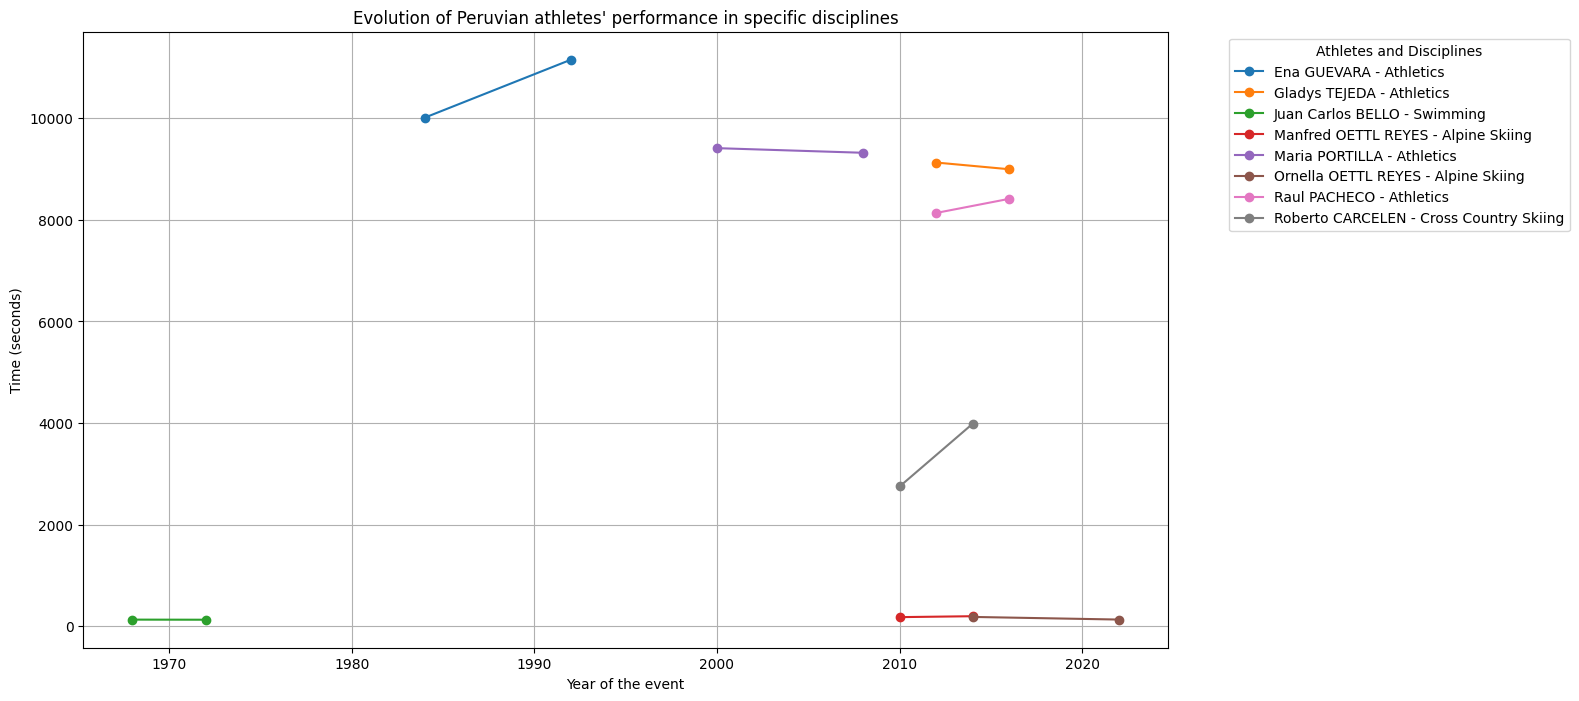

In [17]:
temp_2 = pd.DataFrame(olympic_results_times)

# Convert timedelta to seconds for numerical analysis
def timedelta_to_seconds(timedelta):
    if pd.isna(timedelta):
        return None
    return timedelta.total_seconds()

# Add a new column for time in seconds
temp_2['time_seconds'] = temp_2['value_unit'].apply(timedelta_to_seconds)

temp_2['game_year'] = pd.to_numeric(temp_2['game_year'], errors='coerce')

# Filter to include only valid time values
valid_times = temp_2[temp_2['time_seconds'].notna()]

# Group by athlete, discipline, and year to calculate average times
grouped = valid_times.groupby(['athlete_full_name', 'discipline_title', 'game_year'])['time_seconds'].mean().reset_index()

# Count participations per athlete and discipline, and filter those with at least 2 participations
participations = grouped.groupby(['athlete_full_name', 'discipline_title']).size().reset_index(name='participations')
athletes_with_min_participations = participations[participations['participations'] >= 2]

# Filter the grouped data to include only athletes with the minimum required participations
filtered_grouped = grouped.merge(athletes_with_min_participations[['athlete_full_name', 'discipline_title']], 
                                 on=['athlete_full_name', 'discipline_title'])

# Plot the evolution of performance over time
fig, ax = plt.subplots(figsize=(14, 8))

for (athlete, discipline), group_data in filtered_grouped.groupby(['athlete_full_name', 'discipline_title']):
    ax.plot(group_data['game_year'], group_data['time_seconds'], marker='o', label=f'{athlete} - {discipline}')

ax.set_title("Evolution of Peruvian athletes' performance in specific disciplines")
ax.set_xlabel('Year of the event')
ax.set_ylabel('Time (seconds)')

ax.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Athletes and Disciplines', frameon=True)

plt.grid(True)
plt.show()


Answer: Most athletes increased their time after their first participation or had no major variation. However, the improvement in the athletes Gladys Tejeda and Ornella Oettl, who reduced their time compared to their first participation, stands out.

## Export to CSV (DataFrame with time (seconds))

In [22]:
# Export to csv (time)
# valid_times.to_csv('olympic_results_peru_time_seconds.csv', index=False)